# **LÓGICA DE PROGRAMAÇÃO  = PASSO A PASSO PARA A SOLUÇÃO DO DESAFIO**

In [5]:
#Importação de bibliotecas
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import smtplib
import email.message as em

In [6]:
import pandas as pd
tabela_vendas=pd.read_excel('/content/Vendas+-+Base+de+Dados (1).xlsx')
tabela_vendas.head()


,Cód.,Data,Loja,Produto,Quantidade,Valor Unitário
0,1,5/18/2022,Maranhão,Caixa de som,4,79
1,2,7/24/2022,Santa Catarina,Notebook,9,3789
2,3,12/20/2022,Rio de Janeiro,Notebook,3,3789
3,4,1/22/2022,Espírito Santo,Nobreak,9,1279
4,5,9/11/2022,Tocantins,Impressora,9,699


In [7]:
display(tabela_vendas)

,Cód.,Data,Loja,Produto,Quantidade,Valor Unitário
0,1,5/18/2022,Maranhão,Caixa de som,4,79
1,2,7/24/2022,Santa Catarina,Notebook,9,3789
2,3,12/20/2022,Rio de Janeiro,Notebook,3,3789
3,4,1/22/2022,Espírito Santo,Nobreak,9,1279
4,5,9/11/2022,Tocantins,Impressora,9,699
...,...,...,...,...,...,...
14995,14996,8/18/2022,São Paulo,Webcam,4,150
14996,14997,1/6/2022,São Paulo,Impressora,9,699
14997,14998,11/13/2022,São Paulo,Notebook,9,3789
14998,14999,6/29/2022,São Paulo,Caixa de som,6,79


In [8]:
tb_quantidade_produto=tabela_vendas.groupby('Produto').sum()
tb_quantidade_produto=tb_quantidade_produto[['Quantidade', 'Valor Unitário']].sort_values(by='Quantidade',ascending=False)
#tabela_vendas.head()
display(tb_quantidade_produto)

<ipython-input-8-db24359e620c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tb_quantidade_produto=tabela_vendas.groupby('Produto').sum()


,Quantidade,Valor Unitário
Produto,,
Impressora,13285,1677600
Notebook,12930,9093600
Monitor,9923,2160000
Nobreak,6778,1534800
Tablet,6684,1618800
Teclado,6631,216000
Webcam,6562,180000
Caixa de som,6535,94800
PC,6518,7080000


In [9]:
tabela_vendas['Faturamento']= tabela_vendas['Quantidade']*tabela_vendas['Valor Unitário']
#display(tabela_vendas)
tabela_faturamento_produto=tabela_vendas.groupby('Produto').sum()
tabela_faturamento_produto=tabela_faturamento_produto[['Faturamento']].sort_values(by='Faturamento', ascending=False)
display(tabela_faturamento_produto)

<ipython-input-9-117bd38112ed>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabela_faturamento_produto=tabela_vendas.groupby('Produto').sum()


,Faturamento
Produto,
Notebook,48991770
PC,38456200
Monitor,11907600
Impressora,9286215
Tablet,9016716
Nobreak,8669062
Teclado,1193580
Webcam,984300
Mouse,725872


Calcular a loja /estado que mais vendeu em faturamento

In [10]:

tabela_vendas_loja=tabela_vendas.groupby('Loja').sum()
tabela_vendas_loja= tabela_vendas_loja[['Faturamento']].sort_values(by='Faturamento', ascending=False)
#tabela_vendas_loja[['Faturamento']]
tabela_vendas_loja


<ipython-input-10-f05bf9f047fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabela_vendas_loja=tabela_vendas.groupby('Loja').sum()


,Faturamento
Loja,
São Paulo,41018776
Rio de Janeiro,12274351
Minas Gerais,11491527
Paraná,7611645
Pernambuco,7041123
Rio Grande do Sul,6618703
Goiás,6288009
Bahia,5030257
Santa Catarina,4971700


Ticket médio

In [11]:
tabela_vendas['Ticket Médio']=tabela_vendas['Valor Unitário']
tb_ticket_medio = tabela_vendas.groupby('Loja').mean()
tb_ticket_medio = tb_ticket_medio[['Ticket Médio']].sort_values(by='Ticket Médio', ascending=False)
tb_ticket_medio.head(10)

<ipython-input-11-cb0f2d9b5e7a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tb_ticket_medio = tabela_vendas.groupby('Loja').mean()


,Ticket Médio
Loja,
Acre,2142.769231
Sergipe,1735.333333
Tocantins,1734.306452
Rio Grande do Sul,1690.043909
Pará,1683.746177
Santa Catarina,1683.562620
Pernambuco,1683.036849
Paraná,1608.725917
Bahia,1606.045226


In [12]:
grafico=px.bar(tabela_vendas_loja,y='Faturamento')
grafico.show()

In [13]:
grafico=px.bar(tabela_vendas_loja, y='Faturamento', x=tabela_vendas_loja.index)
grafico.show()

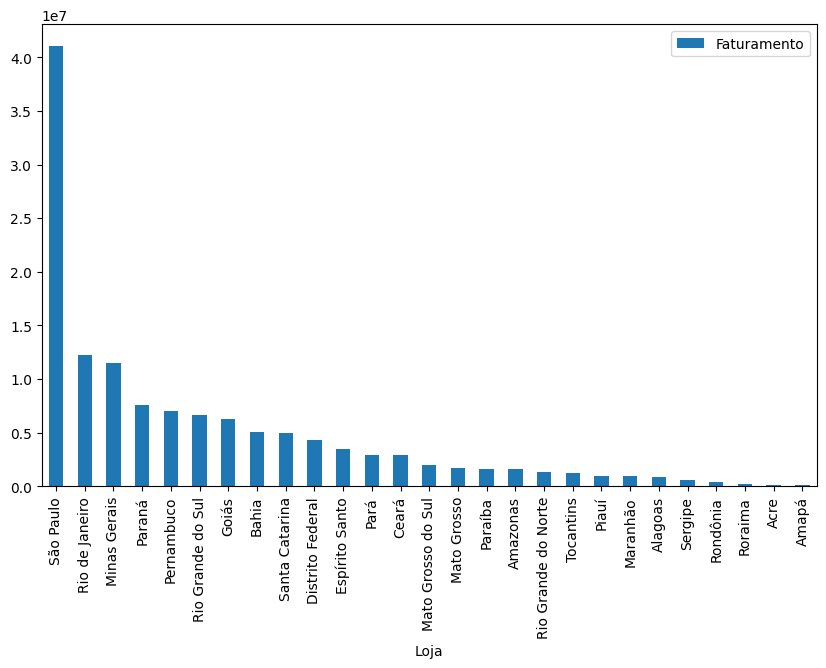

In [14]:
teste=tabela_vendas_loja.plot.bar(figsize=(10,6))
plt.show()

# **FORMATAÇÕES NUMÉRICAS E MONETÁRIAS**

**Loja/Estado que mais vendeu(em faturamento)**

In [ ]:
from babel.numbers import format_currency

#Formatação monetária
tb_faturamento_loja_formatado = pd.DataFrame(tabela_vendas_loja['Faturamento'].apply(lambda x:format_currency(x, 'BRL', locale='pt_BR')))
display(tb_faturamento_loja_formatado)

**Produtos mais vendidos (em quantidade)**

**Produtos mais vendidos (em faturamento)**

In [44]:
#Formatação monetária
tb_faturamento_produto_formatado = pd.DataFrame(tabela_faturamento_produto['Faturamento'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR')))
display(tb_faturamento_produto_formatado)


,Faturamento
Produto,
Notebook,"R$ 48.991.770,00"
PC,"R$ 38.456.200,00"
Monitor,"R$ 11.907.600,00"
Impressora,"R$ 9.286.215,00"
Tablet,"R$ 9.016.716,00"
Nobreak,"R$ 8.669.062,00"
Teclado,"R$ 1.193.580,00"
Webcam,"R$ 984.300,00"
Mouse,"R$ 725.872,00"


**Ticket Médio por Loja/Estado**

In [43]:
from pandas.io.formats.format import format_array
#Formatação monetária
tb_ticket_medio_formatado = pd.DataFrame(tb_ticket_medio['Ticket Médio'].apply(lambda x:format_currency(x, 'BRL', locale='pt_BR')))
display(tb_ticket_medio_formatado)

,Ticket Médio
Loja,
Acre,"R$ 2.142,77"
Sergipe,"R$ 1.735,33"
Tocantins,"R$ 1.734,31"
Rio Grande do Sul,"R$ 1.690,04"
Pará,"R$ 1.683,75"
Santa Catarina,"R$ 1.683,56"
Pernambuco,"R$ 1.683,04"
Paraná,"R$ 1.608,73"
Bahia,"R$ 1.606,05"


**Enviar Relatório de Indicadores de Desempenho**

In [45]:
#ENVIO DE EMAIL - RETIRADO DO STACKOVERFLOW
import smtplib
import email.message as em


corpo_email = f"""
<p>Prezados,</p>
<p>Segue o relatório de vendas do mês.</p>

<p><b>Faturamento por loja:</b></p>
<p>{tb_faturamento_loja_formatado.to_html()} </p>

<p><b>Quantidade vendida por produto:</b></p>
<p>{tb_quantidade_produto.to_html()} </p>

<p><b>Faturamento por produto:</b></p>
<p>{tb_faturamento_produto_formatado.to_html()} </p>

<p><b>Ticket por loja:</b></p>
<p>{tb_ticket_medio_formatado.to_html()} </p>

<p>Qualquer dúvida estou à disposição.</p>

<p>Atenciosamente</p>
<p>#Seu_nome</p>
"""
#CONFIGURAÇÕES PARA ENVIO
msg = em.Message()
msg['Subject'] = "Relatório de Vendas" #ASSUNTO DO E-MAIL#
msg['From'] =  #E-MAIL QUE VAI ENVIAR O E-MAIL#
#
msg['To'] = #E-MAIL QUE VAI RECEBER
password =  #SENHA DO E-MAIL QUE VAI ENVIAR
msg.add_header('Content-Type', 'text/html')#TIPO FORMATO DO CONTEÚDO
msg.set_payload(corpo_email )#MENSAGEM / CORPO DO E-MAIL

#CONFIGURAÇÕES DO GMAIL
s = smtplib.SMTP('smtp.gmail.com: 587')
s.starttls()#SISTENA DE SEGURANÇA

# CREDENCIAIS DO LOGIN
s.login(msg['From'], password)
s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
print('Email enviado')

Email enviado
